In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image1.jpg
/kaggle/input/finalmathematics-for-machine-learning-assignment-1/doc_1.txt
/kaggle/input/finalmathematics-for-machine-learning-assignment-1/doc_0.txt
/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image2.jpeg


# Part-1 Pipeline

1. Load the data
2. Preprocess the docs by removing stopwords, stemming
3. Find TF
4. Find IDF
5. Find the product i.e. TF-IDF
6. Find the cosine similarity

# Opening the given docs

In [3]:
def open_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    return str(text)

In [4]:
doc0 = open_file("/kaggle/input/finalmathematics-for-machine-learning-assignment-1/doc_0.txt")
doc1 = open_file("/kaggle/input/finalmathematics-for-machine-learning-assignment-1/doc_1.txt")

# Preprocess the docs

In [5]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download("wordnet", "/nltk_data/")
nltk.download('stopwords')
def preprocess_docs(document):
    '''
    Args: document: The string text
    Returns: The preprocessed text
    
    The function preprocess the data by removing stop words and stemming
    '''
    document_new = document.split()
    text = []
    ps = PorterStemmer()
    for word in document_new:
        word = re.sub('[^a-zA-Z]', '', word)
        word = word.lower()
        if word not in stopwords.words('english'):
            text.append(ps.stem(word))
    return " ".join(text)

[nltk_data] Downloading package wordnet to /nltk_data/...
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
preprocessed_doc0 = str(preprocess_docs(doc0))
preprocessed_doc1 = str(preprocess_docs(doc1))
preprocessed_docs = [preprocessed_doc0, preprocessed_doc1]

In [7]:
preprocessed_doc1

'gloriou morn late spring earli summer care take dainti sheen grass leaf blush deeper green year seem like fair young maid trembl strang waken puls brink womanhood quaint back street kingston came water edg look quit picturesqu flash sunlight glint river drift barg wood towpath trimkept villa side harri red orang blazer grunt away scull distant glimps grey old palac tudor made sunni pictur bright calm full life yet peac earli day though felt dreamili lull muse fit muse kingston kyningestun call day saxon king crown great csar cross river roman legion camp upon slope upland csar like later year elizabeth seem stop everywher respect good queen bess didnt put publichous nut publichous england virgin queen there scarc pub attract within ten mile london seem look stop slept time wonder suppos harri say turn new leaf becam great good man got prime minist die would put sign publichous patronis harri glass bitter hous harri two scotch cold summer  harri chuck decemb  would mani would hous neve

# Term Frequency

In [8]:
print(len(preprocessed_doc0))
def termFreq(document):
    '''
    Args: document: Takes the string document 
    Returns: The term frequency of the given document
    Return type: dict
    
    The function calculate the term frequeny of the terms in the given document and return the values as a python dictionary
    '''
    tf = {}
    document = document.split()
    total_words = len(document)
    for word in document:
        if word not in tf:
            tf[word] = 0
        tf[word] += 1/total_words
    return tf
    

2665


In [9]:
tfFirst = termFreq(preprocessed_doc0)
tfSecond = termFreq(preprocessed_doc1)

# IDF

In [10]:
import math
def idf(documents_list):
    '''
    Args: documents_list: A python list of documents
    Returns: a python dictionary of the IDF values
    
    The function calculates the IDF values of the terms from both the documents and return thenm in the form of a python dictionary
    '''
    idf = {}
    N = len(documents_list)
    for document in documents_list:
        document = document.split()
        for word in set(document):
            if word not in idf:
                idf[word] = 0
            idf[word] += 1
    for word in idf:
        number_of_docs = idf[word]
        idf[word] = (math.log10(N/(number_of_docs+1)))
    return idf

In [11]:
idf_val = idf(preprocessed_docs)
idf_val

{'local': 0.0,
 'journal': 0.0,
 'center': 0.0,
 'call': -0.17609125905568127,
 'fill': 0.0,
 'three': -0.17609125905568127,
 'air': -0.17609125905568127,
 'reclaim': 0.0,
 'wonder': -0.17609125905568127,
 'familiar': -0.17609125905568127,
 'race': 0.0,
 'cast': -0.17609125905568127,
 'guard': 0.0,
 'uncov': 0.0,
 'narrow': 0.0,
 'observ': 0.0,
 'long': -0.17609125905568127,
 'chapter': 0.0,
 'evershift': 0.0,
 'sacr': 0.0,
 'abbey': 0.0,
 'carv': -0.17609125905568127,
 'town': -0.17609125905568127,
 'herbal': 0.0,
 'live': -0.17609125905568127,
 'document': 0.0,
 'ground': -0.17609125905568127,
 'stone': -0.17609125905568127,
 'end': 0.0,
 'behind': -0.17609125905568127,
 'bustl': 0.0,
 'silent': -0.17609125905568127,
 'anoth': 0.0,
 'someth': -0.17609125905568127,
 'realiz': 0.0,
 'wisdom': 0.0,
 'thrill': 0.0,
 'face': -0.17609125905568127,
 'greenwood': 0.0,
 'met': -0.17609125905568127,
 'filter': 0.0,
 'lay': 0.0,
 'lost': -0.17609125905568127,
 'discoveri': 0.0,
 'step': 0.0,
 '

# TF-IDF

In [12]:
def tfIDF(tf, idf):
    '''
    Args: tf, idf: dict
    Returns: tfidf: dict
    '''
    tfidf = {}
    for word in tf:
        tfidf[word] =  tf[word] * idf[word]
    return tfidf

In [13]:
tfidfFirst = tfIDF(tfFirst, idf_val)
tfidfSecond = tfIDF(tfSecond, idf_val)

tfidfFirst

{'unexpectedli': 0.0,
 'warm': 0.0,
 'spring': -0.00086531331231293,
 'morn': -0.000432656656156465,
 'sun': -0.00086531331231293,
 'cast': -0.00086531331231293,
 'gentl': 0.0,
 'glow': -0.000432656656156465,
 'awaken': 0.0,
 'earth': -0.00086531331231293,
 'three': -0.000432656656156465,
 'intrepid': 0.0,
 'friendsjulian': 0.0,
 'anna': 0.0,
 'simonset': 0.0,
 'sens': 0.0,
 'adventur': 0.0,
 'puls': -0.000432656656156465,
 'vein': 0.0,
 'destin': 0.0,
 'fabl': 0.0,
 'greenwood': 0.0,
 'forest': 0.0,
 'renown': 0.0,
 'ancient': -0.0012979699684693951,
 'mysteri': 0.0,
 'ruin': 0.0,
 'windmer': 0.0,
 'abbey': 0.0,
 'hidden': 0.0,
 'deep': -0.000432656656156465,
 'within': -0.00086531331231293,
 'verdant': 0.0,
 'embrac': 0.0,
 'julian': 0.0,
 'clad': 0.0,
 'jacket': 0.0,
 'vibrant': 0.0,
 'color': 0.0,
 'carri': -0.0012979699684693951,
 'old': -0.00173062662462586,
 'leatherbound': 0.0,
 'journal': 0.0,
 'belong': 0.0,
 'grandfath': 0.0,
 'note': 0.0,
 'historian': 0.0,
 'explor': 0.0,


In [14]:
print(tfidfSecond)

{'gloriou': 0.0, 'morn': -0.00029026031712474934, 'late': 0.0, 'spring': -9.675343904158312e-05, 'earli': 0.0, 'summer': 0.0, 'care': -0.0005805206342494986, 'take': 0.0, 'dainti': 0.0, 'sheen': 0.0, 'grass': 0.0, 'leaf': 0.0, 'blush': 0.0, 'deeper': 0.0, 'green': 0.0, 'year': 0.0, 'seem': -0.0009675343904158309, 'like': -0.001064287829457414, 'fair': 0.0, 'young': 0.0, 'maid': 0.0, 'trembl': 0.0, 'strang': 0.0, 'waken': 0.0, 'puls': -9.675343904158312e-05, 'brink': 0.0, 'womanhood': 0.0, 'quaint': 0.0, 'back': -0.0011610412684989972, 'street': 0.0, 'kingston': 0.0, 'came': 0.0, 'water': 0.0, 'edg': -9.675343904158312e-05, 'look': 0.0, 'quit': 0.0, 'picturesqu': 0.0, 'flash': 0.0, 'sunlight': 0.0, 'glint': 0.0, 'river': 0.0, 'drift': 0.0, 'barg': 0.0, 'wood': 0.0, 'towpath': 0.0, 'trimkept': 0.0, 'villa': 0.0, 'side': 0.0, 'harri': 0.0, 'red': 0.0, 'orang': 0.0, 'blazer': 0.0, 'grunt': 0.0, 'away': 0.0, 'scull': 0.0, 'distant': -0.00029026031712474934, 'glimps': 0.0, 'grey': 0.0, 'old'

In [15]:
ans_doc0 = dict(sorted(tfidfFirst.items(), key=lambda x:x[1], reverse=True))
ans_doc1 = dict(sorted(tfidfSecond.items(), key=lambda x:x[1], reverse=True))
final_doc0 = list(ans_doc0.items())[:10]
final_doc1 = list(ans_doc1.items())[:10]

print("The top 10 TF-IDF for doc0 are", final_doc0)
print("The top 10 TF-IDF for doc1 are", final_doc1)

The top 10 TF-IDF for doc0 are [('unexpectedli', 0.0), ('warm', 0.0), ('gentl', 0.0), ('awaken', 0.0), ('intrepid', 0.0), ('friendsjulian', 0.0), ('anna', 0.0), ('simonset', 0.0), ('sens', 0.0), ('adventur', 0.0)]
The top 10 TF-IDF for doc1 are [('gloriou', 0.0), ('late', 0.0), ('earli', 0.0), ('summer', 0.0), ('take', 0.0), ('dainti', 0.0), ('sheen', 0.0), ('grass', 0.0), ('leaf', 0.0), ('blush', 0.0)]


**The top 10 TF-IDF scores for doc0 are:**

('unexpectedli', 0.0), 
('warm', 0.0), 
('gentl', 0.0), 
('awaken', 0.0), 
('intrepid', 0.0), 
('friendsjulian', 0.0), 
('anna', 0.0), 
('simonset', 0.0), 
('sens', 0.0), 
('adventur', 0.0)

**The top 10 TF-IDF scores for doc1 are:**

('gloriou', 0.0), 
('late', 0.0), 
('earli', 0.0), 
('summer', 0.0), 
('take', 0.0), 
('dainti', 0.0), 
('sheen', 0.0), 
('grass', 0.0), 
('leaf', 0.0), 
('blush', 0.0)


In [16]:
len(tfidfFirst), len(tfidfSecond)

(302, 980)

# Cosine Similarity

In [17]:
def cosine_similarity(tfidf_vector1, tfidf_vector2):
    '''
    Args: tfidf_vector1, tfidf_vector2: dict
    Returns: similarity: float
    '''
    dot_product = sum(tfidf_vector1[word] * tfidf_vector2[word] for word in set(tfidf_vector1) & set(tfidf_vector2))

    magnitude1 = np.linalg.norm(list(tfidf_vector1.values()))
    magnitude2 = np.linalg.norm(list(tfidf_vector2.values()))

    similarity = dot_product / (magnitude1 * magnitude2)
    print(similarity)
    return similarity

print("The cosine similarity obtained is:",cosine_similarity(tfidfFirst, tfidfSecond))

0.5630641329659742
The cosine similarity obtained is: 0.5630641329659742


In [18]:
'''
**The top 10 TF-IDF scores for doc0 are:**

('unexpectedli', 0.0), 
('warm', 0.0), 
('gentl', 0.0), 
('awaken', 0.0), 
('intrepid', 0.0), 
('friendsjulian', 0.0), 
('anna', 0.0), 
('simonset', 0.0), 
('sens', 0.0), 
('adventur', 0.0)

**The top 10 TF-IDF scores for doc1 are:**

('gloriou', 0.0), 
('late', 0.0), 
('earli', 0.0), 
('summer', 0.0), 
('take', 0.0), 
('dainti', 0.0), 
('sheen', 0.0), 
('grass', 0.0), 
('leaf', 0.0), 
('blush', 0.0)

The cosine similarity obtained is 0.5630641329659742
'''

"\n**The top 10 TF-IDF scores for doc0 are:**\n\n('unexpectedli', 0.0), \n('warm', 0.0), \n('gentl', 0.0), \n('awaken', 0.0), \n('intrepid', 0.0), \n('friendsjulian', 0.0), \n('anna', 0.0), \n('simonset', 0.0), \n('sens', 0.0), \n('adventur', 0.0)\n\n**The top 10 TF-IDF scores for doc1 are:**\n\n('gloriou', 0.0), \n('late', 0.0), \n('earli', 0.0), \n('summer', 0.0), \n('take', 0.0), \n('dainti', 0.0), \n('sheen', 0.0), \n('grass', 0.0), \n('leaf', 0.0), \n('blush', 0.0)\n\nThe cosine similarity obtained is 0.5630641329659742\n"

# Part 2

In [19]:
from PIL import Image
import torch
img1 = Image.open('/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image1.jpg')
img2 = Image.open('/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image2.jpeg')
img1_tensor = torch.tensor(np.array(img1))
img2_tensor = torch.tensor(np.array(img2))


In [20]:
img1_array = np.array(img1)
img2_array = np.array(img2)
n_components = 25
def save_tensor_as_image(image_tensor, file_path):
    image_array = image_tensor.numpy()
    image = Image.fromarray(image_array.astype('uint8'))
    image.save(file_path)

## PCA (Principal Component Analysis):
 PCA is a statistical technique used to reduce the dimensionality of data by finding the principal components that capture the maximum variance.
 In the context of images, PCA can be applied to transform the high-dimensional image data into a lower-dimensional space while preserving the most important features. By selecting a subset of principal components, PCA can compress the image data while minimizing the loss of information.

In [21]:
def apply_pca_compression(image_array, n_components):
    # Flatten the image array
    flattened_image = image_array.reshape(-1, image_array.shape[-1])
    
    # Compute the mean of the flattened image
    mean = np.mean(flattened_image, axis=0)
    
    # Center the flattened image
    centered_image = flattened_image - mean
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(centered_image.T)
    
    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Choose the top 'n_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Project the centered image onto the selected eigenvectors
    compressed_image = np.dot(centered_image, selected_eigenvectors)
    
    # Reconstruct the compressed image
    reconstructed_image = np.dot(compressed_image, selected_eigenvectors.T) + mean
    
    # Reshape the reconstructed image to its original shape
    reconstructed_image = reconstructed_image.reshape(image_array.shape)
    
    return reconstructed_image.astype(np.uint8)

## SVD (Singular Value Decomposition):
 SVD is a powerful matrix factorization technique that decomposes a matrix into three matrices, capturing the underlying structure and reducing redundancy.
 In image compression, SVD can be applied to decompose the image matrix into three matrices representing the spatial structure, color information, and singular values. By retaining only the most significant singular values, SVD can compress the image while preserving its essential features.

In [22]:
def apply_svd_compression(image_tensor, num_components):
    # Convert the image tensor to float and reshape it into a matrix
    image_matrix = image_tensor.float().reshape(image_tensor.shape[0], -1)
    
    # Perform Singular Value Decomposition (SVD)
    U, Sigma, VT = torch.linalg.svd(image_matrix)
    
    # Retain only the top num_components components
    truncated_U = U[:, :num_components]
    truncated_Sigma = torch.diag(Sigma[:num_components])
    truncated_VT = VT[:num_components, :]
    
    # Reconstruct the compressed image matrix
    compressed_image_matrix = torch.matmul(torch.matmul(truncated_U, truncated_Sigma), truncated_VT)
    
    # Reshape the compressed image matrix to its original shape
    compressed_image_tensor = compressed_image_matrix.reshape(image_tensor.shape)
    
    return compressed_image_tensor

# NMF (Non-negative Matrix Factorization): 
NMF is often used for image compression because it decomposes a non-negative data matrix into two non-negative matrices, which can represent parts and features of the data.
In the context of images, NMF can decompose an image matrix into two matrices representing the parts and features of the image. By selecting a suitable number of components, NMF can effectively capture the essential features of the image while reducing its dimensionality.

In [23]:
from sklearn.decomposition import NMF
def compress_image_nmf(image_array, n_components):
    # Flatten the image array
    flattened_image = image_array.reshape(-1, image_array.shape[-1])
    
    # Perform Non-negative Matrix Factorization
    nmf = NMF(n_components=n_components, random_state=42)
    W = nmf.fit_transform(flattened_image)
    H = nmf.components_
    
    # Reconstruct the compressed image
    compressed_image = np.dot(W, H)
    
    # Reshape the reconstructed image to its original shape
    reconstructed_image = compressed_image.reshape(image_array.shape)
    
    return reconstructed_image.astype(np.uint8)

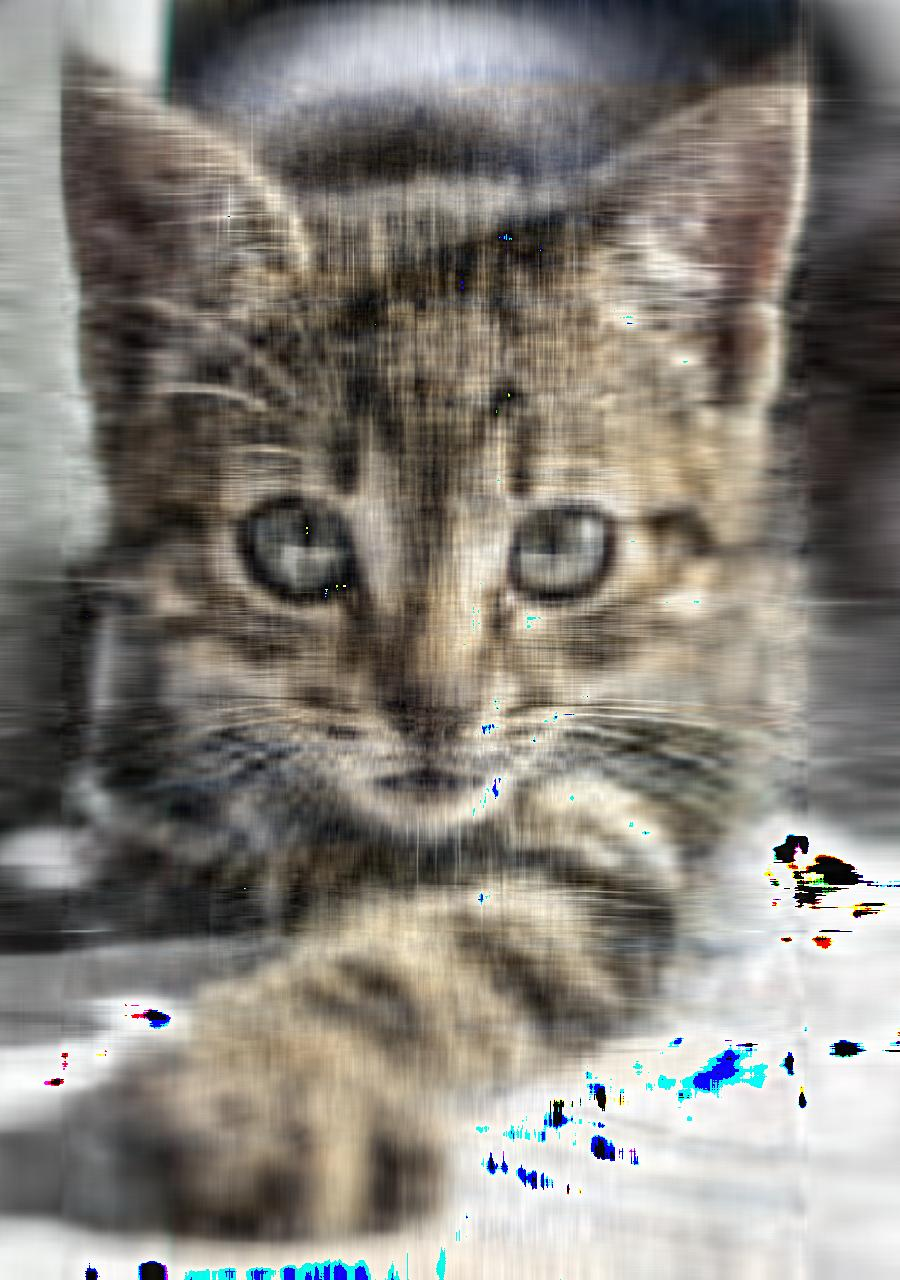

In [24]:
compressed_image1_svd = apply_svd_compression(img1_tensor, n_components)
compressed_image2_svd = apply_svd_compression(img2_tensor, n_components)
save_tensor_as_image(compressed_image1_svd, '/kaggle/working/svd_image1.jpg')
save_tensor_as_image(compressed_image2_svd , '/kaggle/working/svd_image2.jpg')
compressed_image1_svd = Image.open('/kaggle/working/svd_image1.jpg')
compressed_image2_svd = Image.open('/kaggle/working/svd_image2.jpg')
compressed_image1_svd

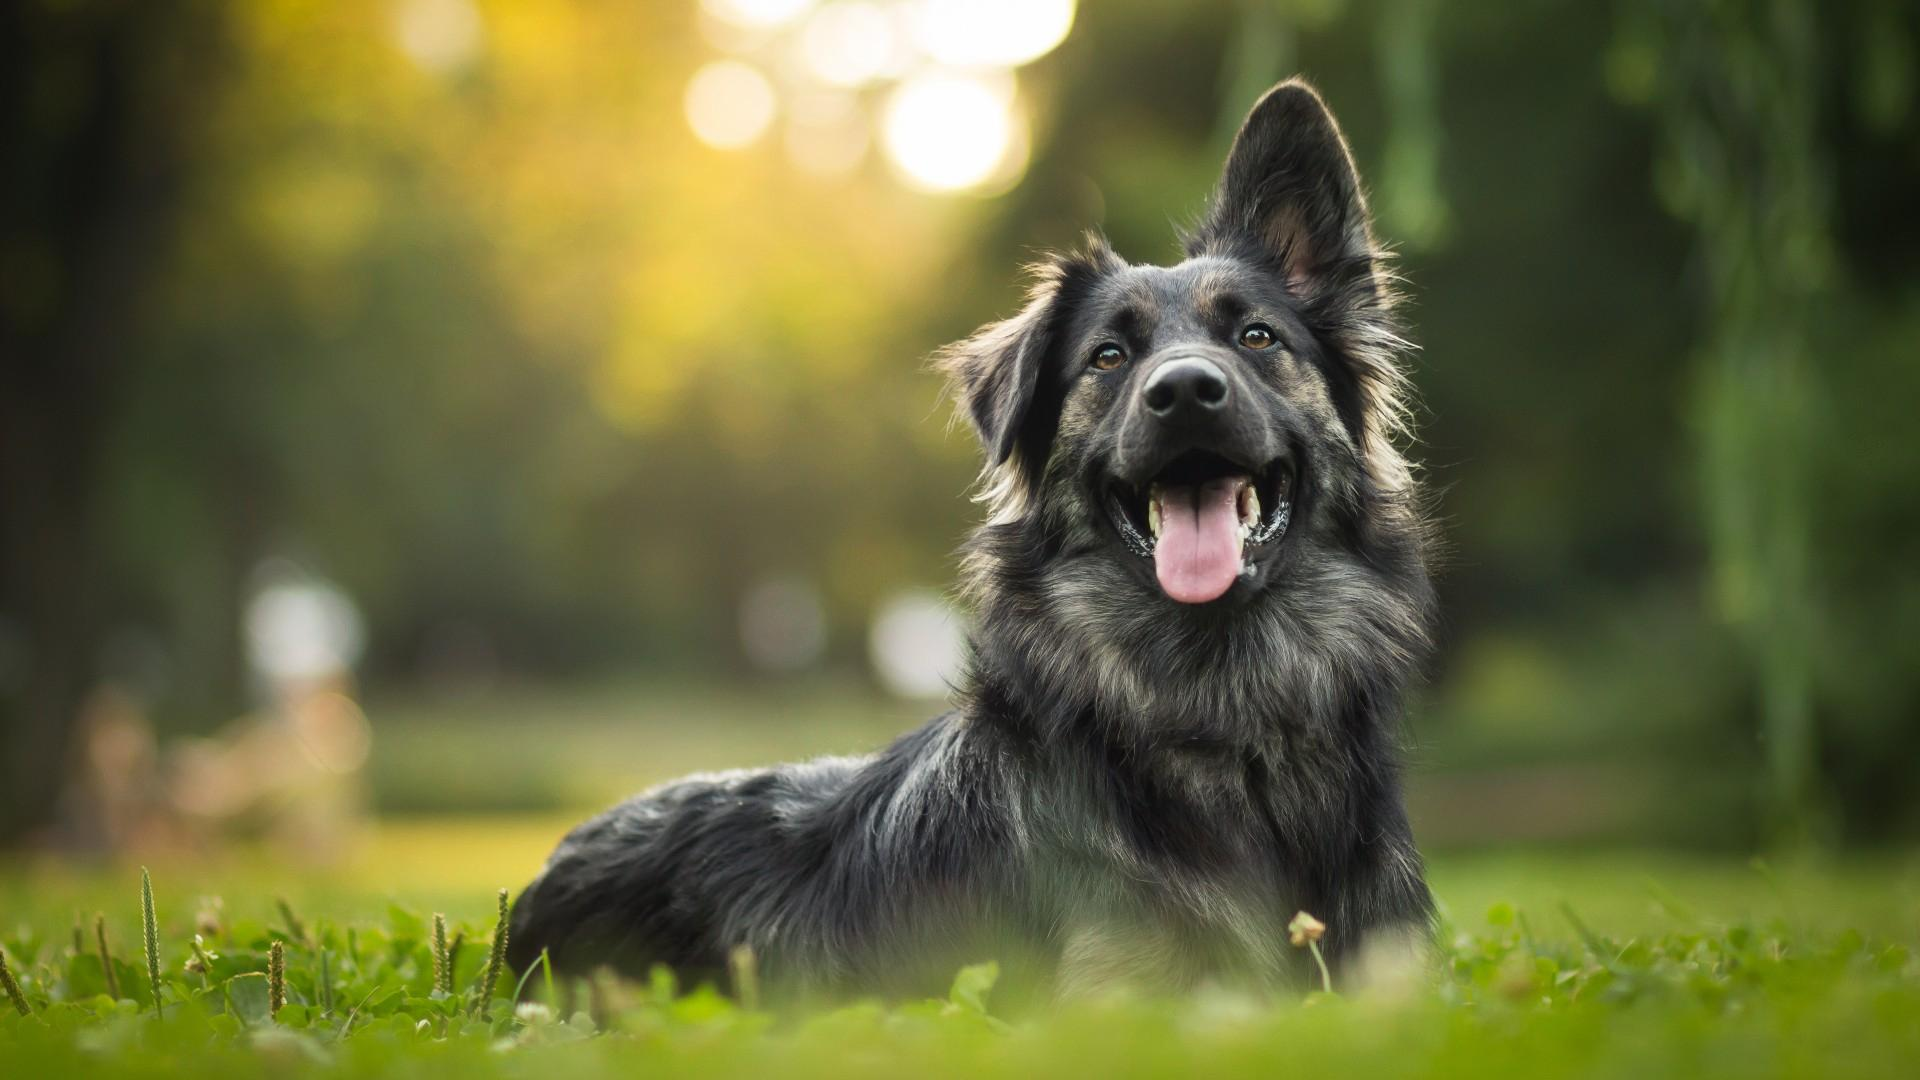

In [25]:
compressed_image1_pca = apply_pca_compression(img1_array, n_components)
compressed_image2_pca = apply_pca_compression(img2_array, n_components)
Image.fromarray(compressed_image1_pca).save("compressed_image1_pca.jpeg")
Image.fromarray(compressed_image2_pca).save("compressed_image2_pca.jpeg")
compressed_image1_pca= Image.open('compressed_image1_pca.jpeg')
compressed_image2_pca= Image.open('compressed_image2_pca.jpeg')
compressed_image2_pca


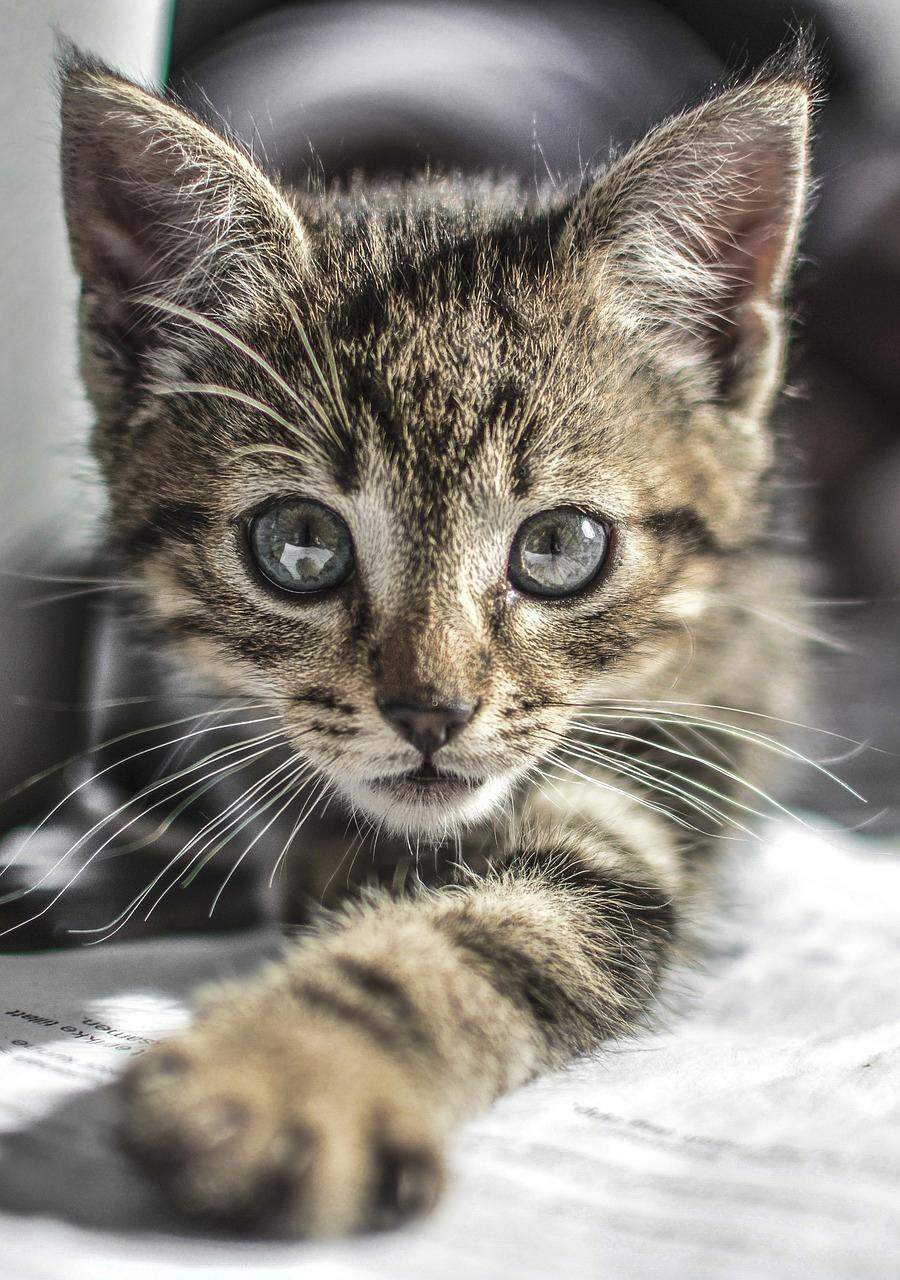

In [26]:
compressed_image1_nmf = compress_image_nmf(img1_array, n_components)
compressed_image2_nmf = compress_image_nmf(img2_array, n_components)


# Convert NumPy arrays to PIL Image objects
compressed_image1_nmf_pil = Image.fromarray(compressed_image1_nmf)
compressed_image2_nmf_pil = Image.fromarray(compressed_image2_nmf)

# Save the compressed images
compressed_image1_nmf_pil.save("compressed_image1_nmf.jpeg")
compressed_image2_nmf_pil.save("compressed_image2_nmf.jpeg")

compressed_image1_nmf= Image.open('compressed_image1_nmf.jpeg')
compressed_image2_nmf= Image.open('compressed_image2_nmf.jpeg')
compressed_image1_nmf

In [27]:
def calculate_psnr(original_image, compressed_image): 
    # Compute the mean squared error
    mse = np.mean((original_image - compressed_image) ** 2)
    
    # Compute the maximum possible pixel value
    max_pixel_value = 255
    
    # Compute PSNR
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    
    return psnr


In [28]:
def calculate_compression_factor(original_size, compressed_size):
    return original_size / compressed_size


In [29]:
psnr_image1_pca = calculate_psnr(img1_array, compressed_image1_pca)
psnr_image2_pca = calculate_psnr(img2_array, compressed_image2_pca)
psnr_image1_svd = calculate_psnr(img1_array, compressed_image1_svd)
psnr_image2_svd = calculate_psnr(img2_array, compressed_image2_svd)
psnr_image1_nmf = calculate_psnr(img1_array, compressed_image1_nmf)
psnr_image2_nmf = calculate_psnr(img2_array, compressed_image2_nmf)

In [30]:
import os
compression_factor_image1_pca = calculate_compression_factor(os.path.getsize('/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image1.jpg'), os.path.getsize('/kaggle/working/compressed_image1_pca.jpeg'))
compression_factor_image2_pca = calculate_compression_factor(os.path.getsize('/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image2.jpeg'), os.path.getsize('/kaggle/working/compressed_image2_pca.jpeg'))


In [31]:

compression_factor_image1_svd = calculate_compression_factor(os.path.getsize('/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image1.jpg'), os.path.getsize('/kaggle/working/svd_image1.jpg'))
compression_factor_image2_svd = calculate_compression_factor(os.path.getsize('/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image2.jpeg'), os.path.getsize('/kaggle/working/svd_image2.jpg'))



In [32]:
compression_factor_image1_nmf = calculate_compression_factor(os.path.getsize('/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image1.jpg'), os.path.getsize('/kaggle/working/compressed_image1_nmf.jpeg'))
compression_factor_image2_nmf = calculate_compression_factor(os.path.getsize('/kaggle/input/finalmathematics-for-machine-learning-assignment-1/part2-image2.jpeg'), os.path.getsize('/kaggle/working/compressed_image2_nmf.jpeg'))

In [33]:
print("PCA Compression Results:")
print("Image 1 PSNR (PCA):", psnr_image1_pca)
print("Image 2 PSNR (PCA):", psnr_image2_pca)
print("Image 1 Compression Factor (PCA):", compression_factor_image1_pca)
print("Image 2 Compression Factor (PCA):", compression_factor_image2_pca)


PCA Compression Results:
Image 1 PSNR (PCA): 35.365625035689
Image 2 PSNR (PCA): 39.99536929395695
Image 1 Compression Factor (PCA): 1.8594305695300903
Image 2 Compression Factor (PCA): 1.9534670703482804


In [34]:
print("\nSVD Compression Results:")
print("Image 1 PSNR (SVD):", psnr_image1_svd)
print("Image 2 PSNR (SVD):", psnr_image2_svd)
print("Image 1 Compression Factor (SVD):", compression_factor_image1_svd)
print("Image 2 Compression Factor (SVD):", compression_factor_image2_svd)


SVD Compression Results:
Image 1 PSNR (SVD): 29.640898913964655
Image 2 PSNR (SVD): 33.129546371829285
Image 1 Compression Factor (SVD): 2.7498287355898494
Image 2 Compression Factor (SVD): 2.2489937532199895


In [35]:
print("\nNMF Compression Results:")
print("Image 1 PSNR (NMF):", psnr_image1_nmf)
print("Image 2 PSNR (NMF):", psnr_image2_nmf)
print("Image 1 Compression Factor (NMF):", compression_factor_image1_nmf)
print("Image 2 Compression Factor (NMF):", compression_factor_image2_nmf)


NMF Compression Results:
Image 1 PSNR (NMF): 35.34310490050107
Image 2 PSNR (NMF): 39.910622797940746
Image 1 Compression Factor (NMF): 1.8579590983520886
Image 2 Compression Factor (NMF): 1.8881552269470951


In [37]:
import os
import pandas as pd


image_directory = "/kaggle/working/"


image_filenames = sorted(os.listdir(image_directory))


file_sizes_mb = []

# Calculate the size of each image file in MB
for filename in image_filenames:
    # Get the path to the image file
    filepath = os.path.join(image_directory, filename)
    # Get the size of the image file in bytes
    file_size_bytes = os.path.getsize(filepath)
    # Convert the size to megabytes
    file_size_mb = file_size_bytes / (1024 * 1024)
    # Append the size to the list
    file_sizes_mb.append(file_size_mb)

image_filenames = image_filenames[1:]
file_sizes_mb = file_sizes_mb[1:]
print(file_sizes_mb)
df = pd.DataFrame({"Name": [ "part2-image1" ,"part2-image2" ], "Compressed Image Size[MB]": [file_sizes_mb[4],file_sizes_mb[5]]})


df.to_csv("submission.csv", index=False)

print(df)


[0.19161319732666016, 0.19146156311035156, 0.14110946655273438, 0.13639163970947266, 0.12946605682373047, 0.11846923828125]
           Name  Compressed Image Size[MB]
0  part2-image1                   0.129466
1  part2-image2                   0.118469


# RESULTS
For both images, the PSNR values obtained from PCA, SVD, and NMF compression are relatively high, ranging from approximately 35 to 40 dB. This suggests that the compression methods effectively retain the visual fidelity of the images, with minimal loss of quality.

Overall, the results indicate that PCA, SVD, and NMF achieve comparable compression performance in terms of file size reduction and preservation of image quality. These methods can be considered suitable for image compression tasks where maintaining high visual fidelity is important while reducing storage requirements.